In [9]:
import pandas as pd
import numpy as np

In [3]:
df = pd.read_csv("THY.csv")

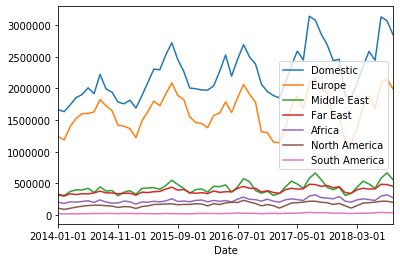

In [8]:
df.set_index('Date').plot()

In [23]:
noise = np.random.randn(df.shape[0]) * 100000

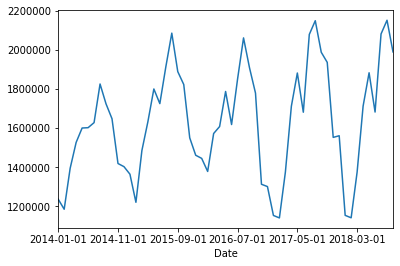

In [25]:
(df.set_index('Date')['Europe']).plot()

```
select $\beta$ value
higher beta, longer time window
lower beta, shorter
v0 = 0
v1 = beta * v0 + (1 - beta) * theta_1
.....
```

In [32]:
data = df['Europe'].tolist()
beta05 = [data[0]]
beta09 = [data[0]]
beta098 = [data[0]]

b1 = 0.5
b2 = 0.9
b3 = 0.98

for i in range(1, df.shape[0]):
    beta05.append(beta05[i - 1] * b1 + data[i] * (1 - b1))
    beta09.append(beta09[i - 1] * b2 + data[i] * (1 - b2))
    beta098.append(beta098[i - 1] * b3 + data[i] * (1 - b3))
    

In [33]:
import matplotlib.pyplot as plt

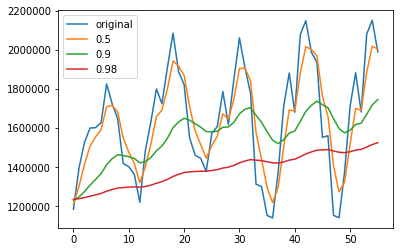

In [43]:
plt.plot(data[1:], label='original')
plt.plot(beta05[1:], label='0.5')
plt.plot(beta09[1:], label='0.9')
plt.plot(beta098[1:], label='0.98')
plt.legend()

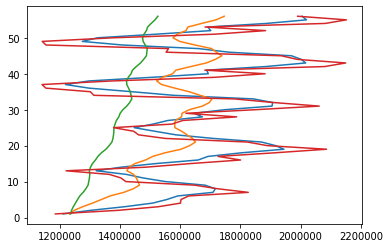

In [39]:
ind = list(range(1,len(beta05)))
plt.plot(beta05[1:], ind)
plt.plot(beta09[1:], ind)
plt.plot(beta098[1:], ind)
plt.plot(data[1:], ind)


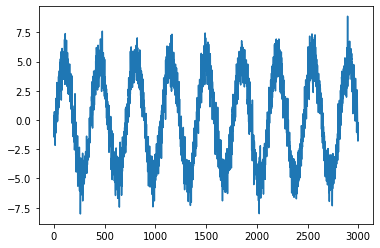

In [85]:
np.random.seed(42)
t = np.arange(3000)
x = np.sin(2*np.pi*t/350 + 6) * 5.
n = np.random.randn(3000)
x += n
plt.plot(x)

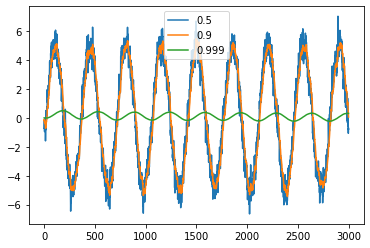

In [124]:
data = x
beta05 = [0.]
beta09 = [0.]
beta098 = [0.]

b1 = 0.5
b2 = 0.9
b3 = 0.999

for i in range(1, len(data)):
    beta05.append(beta05[i - 1] * b1 + data[i] * (1 - b1))
    beta09.append(beta09[i - 1] * b2 + data[i] * (1 - b2))
    beta098.append(beta098[i - 1] * b3 + data[i] * (1 - b3))

# plt.plot(data[1:], label='original')
plt.plot(beta05[1:], label='0.5')
plt.plot(beta09[1:], label='0.9')
plt.plot(beta098[1:], label='0.999')
plt.legend()

Text(0.5, 1.0, 'RMS Prop (temsili), $ \\beta=0.9$')

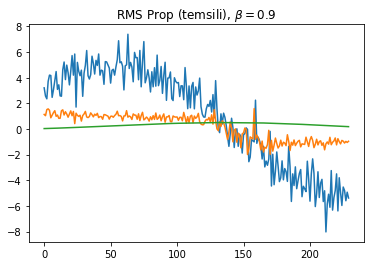

In [128]:
data = x
S = [0.]
res = []
# S09 = [0.]
# S098 = [0.]

# b1 = 0.1
# b2 = 0.9
beta = 0.9

for i in range(1, len(data)):
    Sw = beta * S[i - 1] + (1 - beta) * data[i]**2
    S.append(Sw)
    res.append(data[i] / Sw**0.5)
    

plt.plot(data[50:280])
plt.plot(res[50:280])
plt.plot(beta098[50:280])
# plt.plot(data)
# plt.plot(res)
plt.title(f"RMS Prop (temsili), $ \\beta={beta}$")

Text(0.5, 1.0, 'Adam (temsili), $ \\beta_1=0.9, \\beta_2=0.999$')

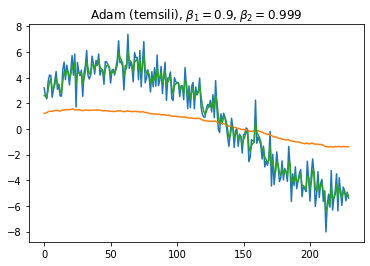

In [133]:
data = x
S = [0.]
V = [0.]
res = []
# S09 = [0.]
# S098 = [0.]

# b1 = 0.1
# b2 = 0.9
beta1 = 0.9
beta2 = 0.999
eps = 1e-8

for i in range(1, len(data)):
    Vw = beta1 * V[i - 1] + (1 - beta1) * data[i]
    Sw = beta2 * S[i - 1] + (1 - beta2) * data[i]**2
    S.append(Sw)
    V.append(Vw)
    Vcorrected = Vw / (1 - beta1**i)
    Scorrected = Sw / (1 - beta2**i)
    res.append(Vcorrected / (Scorrected**0.5 + eps))
    

plt.plot(data[50:280])
plt.plot(res[50:280])
plt.plot(beta05[50:280])
plt.title(f"Adam (temsili), $ \\beta_1={beta1}, \\beta_2={beta2}$")

In [121]:
from keras.optimizers import Adam, RMSprop, SGD

```
Adam()
beta_1=0.9,
beta_2=0.999,
epsilon=1e-07
```

```
RMSprop()
learning_rate=0.001,
rho=0.9,
momentum=0.0,
epsilon=1e-07,
```